In [65]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [66]:
chara_list = pd.read_csv("character_list5.csv",encoding='latin-1')
chara_map = pd.read_csv("character_mapping.csv",encoding='latin-1')
meta_data = pd.read_csv("meta_data7.csv",encoding='latin-1')

In [67]:
# seems this file contains character information from movie
chara_list.head()

,script_id,imdb_character_name,words,gender,age
0,280,betty,311,f,35.0
1,280,carolyn johnson,873,f,NaN
2,280,eleanor,138,f,NaN
3,280,francesca johns,2251,f,46.0
4,280,madge,190,f,46.0


In [68]:
# Seems this dataset showing a relationship between characters' different name
chara_map.head()

,script_id,imdb_id,character_from_script,closest_character_name_from_imdb_match,closest_imdb_character_id
0,1,tt0147800,bianca,bianca stratford,nm0646351
1,1,tt0147800,cameron,cameron james,nm0330687
2,1,tt0147800,chastity,chastity,nm0005517
3,1,tt0147800,joey,joey donner,nm0005080
4,1,tt0147800,kat,kat stratford,nm0005466


In [69]:
# Not sure, but seems review of movies?
meta_data.head()

,script_id,imdb_id,title,year,gross,lines_data
0,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774774443342577775657744434444564456...
1,1512,tt0147800,10 Things I Hate About You,1999,65.0,1777752320274533344457777722433777334443764677...
2,1514,tt0417385,12 and Holding,2005,NaN,5461357777754212454544441367774433446547647753...
3,1517,tt2024544,12 Years a Slave,2013,60.0,4567334777777777777777447777756477777444777777...
4,1520,tt1542344,127 Hours,2010,20.0,453513352345765766777777773340


In [70]:
# 2. chara_list has NaN in 'age' and 'imdb_character_name' column. Gender also has '?' but I will not touch it.
print(chara_list['age'].isnull().sum())
print(chara_list['gender'].isnull().sum())
print(chara_list['words'].isnull().sum())
print(chara_list['imdb_character_name'].isnull().sum())
print(chara_list['script_id'].isnull().sum())

4785
0
0
2
0


In [71]:
# 2. chara_map dataframe has NaN at 'character_from_script' and 'closest_character_name_from_imdb_match' column
print(chara_map['script_id'].isnull().sum())
print(chara_map['imdb_id'].isnull().sum())
print(chara_map['character_from_script'].isnull().sum())
print(chara_map['closest_character_name_from_imdb_match'].isnull().sum())
print(chara_map['closest_imdb_character_id'].isnull().sum())

0
0
53
64
0


In [72]:
# 2. seems 'gross' column has NaN value
print(meta_data['script_id'].isnull().sum())
print(meta_data['imdb_id'].isnull().sum())
print(meta_data['title'].isnull().sum())
print(meta_data['year'].isnull().sum())
print(meta_data['gross'].isnull().sum())
print(meta_data['lines_data'].isnull().sum())

0
0
0
0
338
0


In [73]:
#3-1
relation_wordnyear = chara_list.merge(meta_data,how='left',on='script_id')
relation_wordnyear

,script_id,imdb_character_name,words,gender,age,imdb_id,title,year,gross,lines_data
0,280,betty,311,f,35.0,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...
1,280,carolyn johnson,873,f,NaN,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...
2,280,eleanor,138,f,NaN,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...
3,280,francesca johns,2251,f,46.0,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...
4,280,madge,190,f,46.0,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...
5,280,michael johnson,723,m,38.0,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...
6,280,robert kincaid,1908,m,65.0,tt0112579,The Bridges of Madison County,1995,142.0,4332023434343443203433434334433434343434434344...
7,623,bobby korfin,328,m,NaN,tt0179626,15 Minutes,2001,37.0,7777777777777777777777773677777774457777777777...
8,623,daphne handlova,409,f,28.0,tt0179626,15 Minutes,2001,37.0,7777777777777777777777773677777774457777777777...
9,623,deputy chief fi,347,m,NaN,tt0179626,15 Minutes,2001,37.0,7777777777777777777777773677777774457777777777...


In [74]:
# 3-1
Three_one = relation_wordnyear.iloc[:,[2,7]].groupby('year').sum().reset_index()
Three_one

,year,words
0,1929,8572
1,1931,11601
2,1932,67534
3,1933,21125
4,1934,24646
5,1936,32380
6,1937,26192
7,1939,45109
8,1940,40977
9,1941,56795


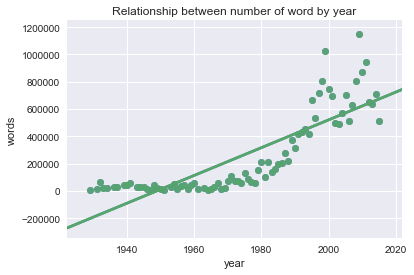

In [75]:
# 3-1 plot with groupby years
sns.regplot(x="year", y="words", data=Three_one, ci=False)
titleA = "Relationship between number of word by year"
plt.title(titleA)
plt.suptitle('')
plt.show()

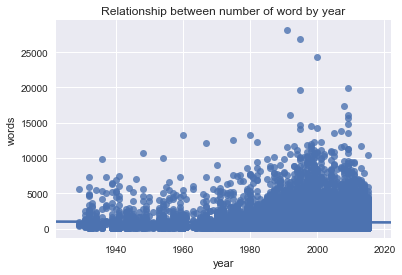

In [76]:
# 3-1 plot without groupby years
sns.regplot(x="year", y="words", data=relation_wordnyear, ci=False)
titleA = "Relationship between number of word by year"
plt.title(titleA)
plt.suptitle('')
plt.show()

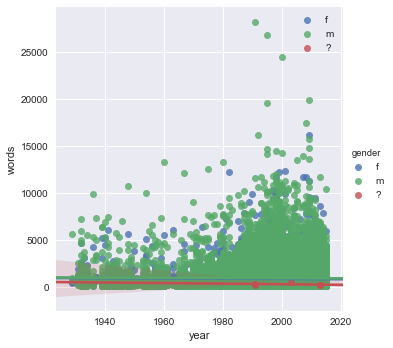

In [80]:
# 3-1 by gender
sns.lmplot(x='year',y='words',hue='gender',data=relation_wordnyear)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


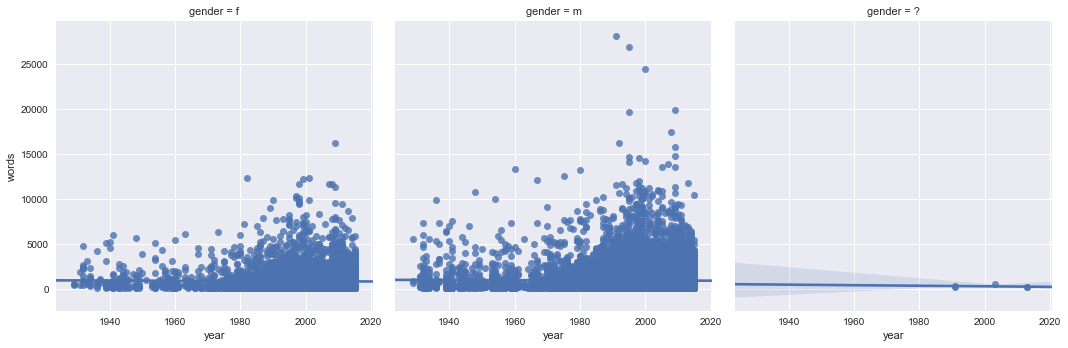

In [81]:
sns.lmplot(x='year',y='words',col='gender',data=relation_wordnyear)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

- We can see dialog increases as year increases.
- By gender, male has slightly higher in dialog quantities.

In [82]:
# 3-2
Three_two = relation_wordnyear.iloc[:,[2,8]].groupby('gross').sum().reset_index()
Three_two

,gross,words
0,0.0,188727
1,1.0,360362
2,2.0,336603
3,3.0,201405
4,4.0,201340
5,5.0,231218
6,6.0,182530
7,7.0,258602
8,8.0,286152
9,9.0,106875


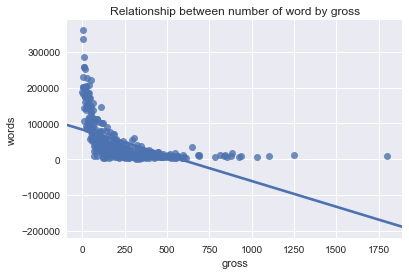

In [84]:
sns.regplot(x="gross", y="words", data=Three_two, ci=False)
titleB = "Relationship between number of word by gross"
plt.title(titleB)
plt.suptitle('')
plt.show()

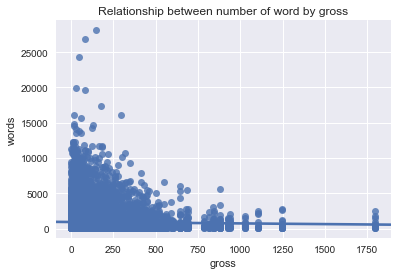

In [85]:
sns.regplot(x="gross", y="words", data=relation_wordnyear, ci=False)
titleB = "Relationship between number of word by gross"
plt.title(titleB)
plt.suptitle('')
plt.show()

- As gross increases, we can see number of dialog decreases